In [19]:
import torch
import torch.nn as nn

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

from einops import rearrange, repeat, reduce

from darts.datasets import AirPassengersDataset

In [21]:
from darts.datasets import ExchangeRateDataset

# Dataset

In [22]:
data = ExchangeRateDataset().load()
time_series = data.values()
time_series.shape

(7588, 8)

In [23]:
data.head(3)

<TimeSeries (DataArray) (time: 3, component: 8, sample: 1)> Size: 192B
array([[[0.7855  ],
        [1.611   ],
        [0.861698],
        [0.634196],
        [0.211242],
        [0.006838],
        [0.593   ],
        [0.525486]],

       [[0.7818  ],
        [1.61    ],
        [0.861104],
        [0.633513],
        [0.211242],
        [0.006863],
        [0.594   ],
        [0.523972]],

       [[0.7867  ],
        [1.6293  ],
        [0.86103 ],
        [0.648508],
        [0.211242],
        [0.006975],
        [0.5973  ],
        [0.526316]]])
Coordinates:
  * time       (time) int64 24B 0 1 2
  * component  (component) object 64B '0' '1' '2' '3' '4' '5' '6' '7'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [24]:
data.components
#data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object', name='component')

In [25]:
print(data.is_univariate)
print(data.is_stochastic)
print(data.is_deterministic)
print(data.is_probabilistic)

False
False
True
False


In [26]:
df = data.pd_dataframe()
df

component,0,1,2,3,4,5,6,7
time,,,,,,,,
0,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.593000,0.525486
1,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.594000,0.523972
2,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.597300,0.526316
3,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.597000,0.523834
4,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.598500,0.527426
...,...,...,...,...,...,...,...,...
7583,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.690846,0.688565
7584,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.695701,0.690288
7585,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.695943,0.691419


In [27]:
df.columns.tolist()

['0', '1', '2', '3', '4', '5', '6', '7']

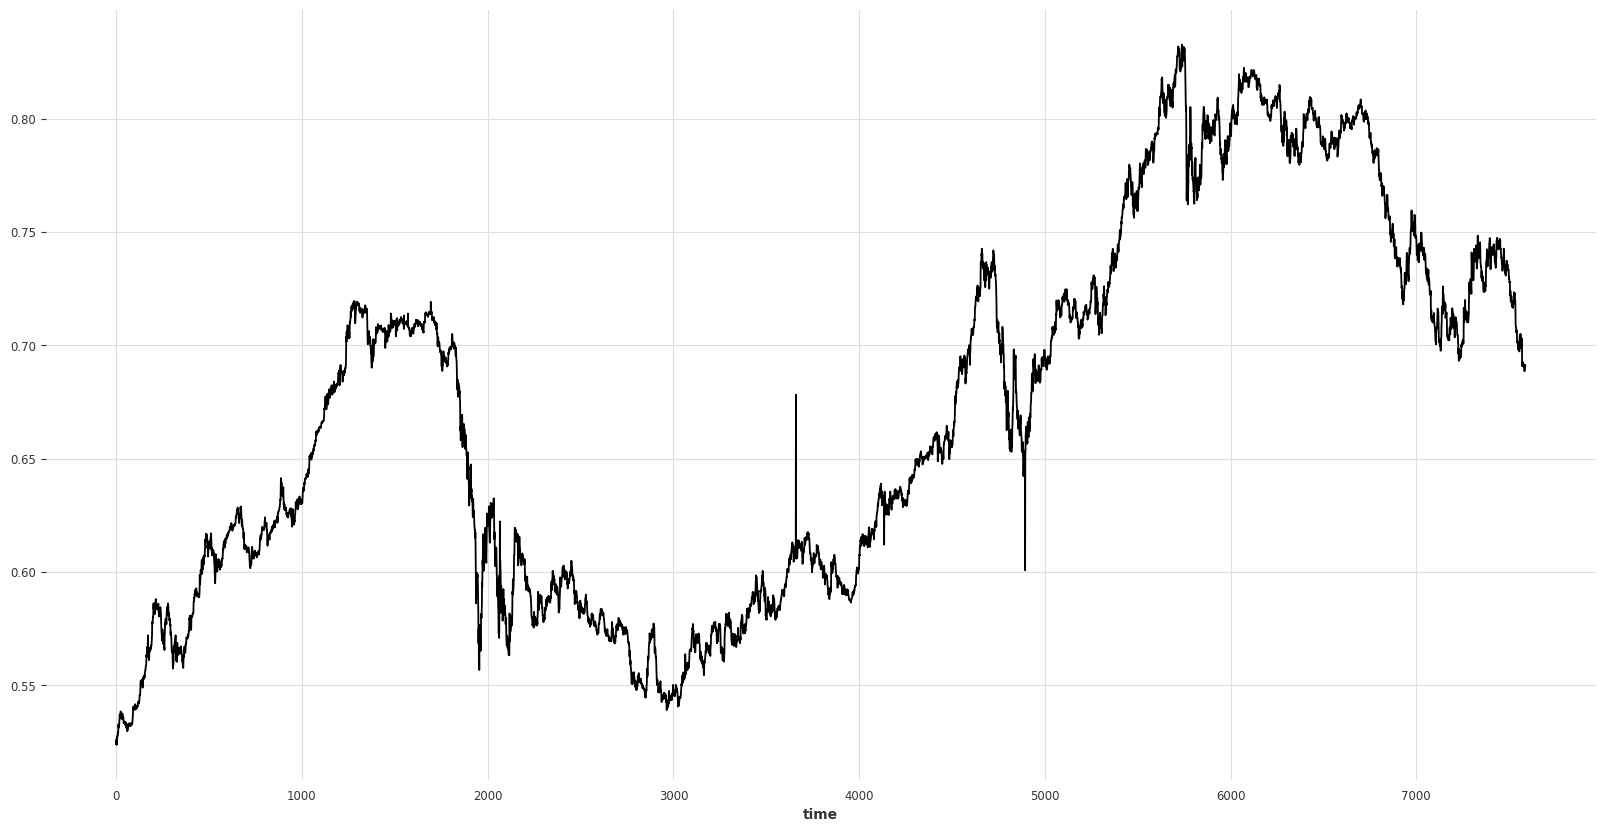

In [34]:
plt.figure(figsize=(20,10))
df["7"].plot()
plt.show()

(13935, 7)
(3485, 7)


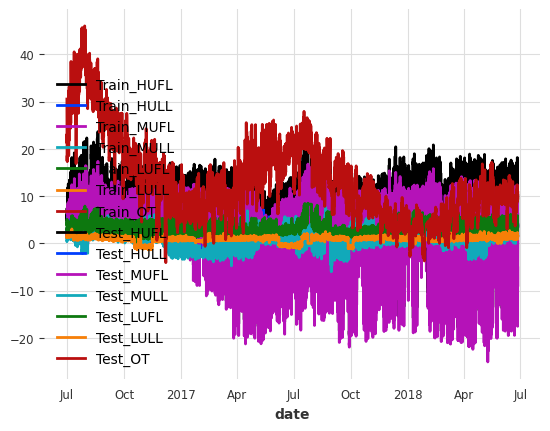

In [12]:
train, test = data.split_before(0.80)
train.plot(label="Train")
test.plot(label="Test")
print(train.values().shape)
print(test.values().shape)

# ARIMAX

# SARIMAX

# N-Beats

In [47]:
from darts.models import NBEATSModel

In [49]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=123)
model.fit(train)
pred = model.predict(n=43, series=train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

<Axes: xlabel='date'>

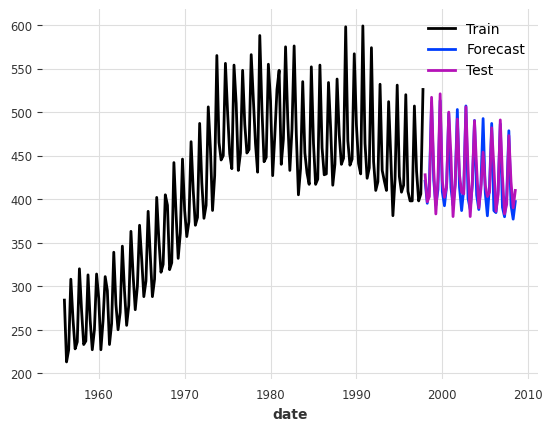

In [50]:
train.plot(label='Train')
pred.plot(label='Forecast')
test.plot(label='Test')

In [51]:
print(f"RMSE: {np.sqrt(mean_squared_error(test.values(), pred.values()))}")
print(f" MAE: {mean_absolute_error(test.values(), pred.values())}")

RMSE: 17.392083223732023
 MAE: 12.59468563355389


# Theta 

# Transformer

# XGBoost